In [1]:
from sagemaker import get_execution_role
role = get_execution_role()

In [2]:
bucket_name = 'flutz-bucket'
folder = 'spotify'
output_path = f's3://{bucket_name}/{folder}/output'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import boto3
import os
!pip install mxnet
import mxnet as mx

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


# Load the data from an RDS database

In [4]:
!pip install pymysql sqlalchemy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
from sqlalchemy import create_engine

In [6]:
for line in map(lambda line: line.split('=', 2), open('rds.txt').read().split('\n')):
    (len(line) > 1) and globals().update({line[0]: line[1]})

data = pd.read_sql_table(table_name='joined', index_col='track_id', 
    con=create_engine(f'mysql+pymysql://{rds_user}:{rds_pwd}@{rds_host}/{rds_db}'))

In [7]:
display(data)

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,,,
2b8fOow8UzyDFAE27YhOZM,Maroon 5,Memories,100,0.764,0.3200,11,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.5750,91.019,189486,4
21jGcNKet2qwijlDFuPiPb,Post Malone,Circles,99,0.695,0.7620,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
3eekarcy7kvN4yt5ZFzltW,Travis Scott,HIGHEST IN THE ROOM,98,0.598,0.4270,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
3ZCTVFBt2Brf31RLEnCkWJ,Billie Eilish,everything i wanted,98,0.704,0.2250,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.2430,120.006,245426,4
2XU0oxnq2qxCpomAAuJY8K,Tones and I,Dance Monkey,98,0.824,0.5880,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.5130,98.027,209438,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
038gsZG1ObZUtFMkwIJnqH,Johann Sebastian Bach,"Viola da gamba Sonata No. 1 in G Major, BWV 10...",0,0.311,0.0758,6,-24.592,1,0.0357,0.7680,0.004250,0.0699,0.1690,84.039,117400,4
02UfNUoxphQFSLYQnSzqhM,Johann Sebastian Bach,"Partita No. 4 in D Major, BWV 828: V. Sarabande",0,0.267,0.2860,1,-17.582,1,0.0500,0.8880,0.692000,0.0620,0.6040,84.736,356987,4
024szQC1tsQq6UFemGBzo0,Chuck Berry,Christmas,0,0.603,0.4890,9,-9.564,1,0.0381,0.9240,0.033100,0.1490,0.7880,89.147,203274,4


In [8]:
data['artist_name'].value_counts()[:24]

Ludwig van Beethoven          1206
Johann Sebastian Bach          679
Wolfgang Amadeus Mozart        275
Frédéric Chopin                 83
Prince                          68
Armin van Buuren                64
Pyotr Ilyich Tchaikovsky        50
Steven Universe                 48
Beyoncé                         44
Trippie Redd                    43
Os Barões Da Pisadinha          41
Wesley Safadão                  41
Drake                           36
YoungBoy Never Broke Again      36
Dilsinho                        34
Unha Pintada                    34
Ferrugem                        34
Tiago Iorc                      33
Ludmilla                        31
BTS                             31
XXXTENTACION                    31
Simone Sommerland               30
MC Kevin o Chris                29
Rich The Kid                    29
Name: artist_name, dtype: int64

In [9]:
test_song = data[data['track_name'] == '1999 (Edit)']

In [10]:
# ix = data[data['track_name'] == '1999 (Edit)'].index
# data.drop(ix , inplace=True)

In [11]:
df = data.copy()

In [12]:
# Dropping non-feature columns
df.drop(['artist_name', 'track_name'], axis=1, inplace=True)

# Scaling data

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

# PCA

### PCA: Model training

In [15]:
from sagemaker import PCA

In [16]:
pca_SM = PCA(role=role,
             train_instance_count=1,
             train_instance_type='ml.c4.xlarge',
             output_path=output_path,
             num_components=12)

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [17]:
train_data = df_scaled.values.astype('float32')

In [18]:
%%time
pca_SM.fit(pca_SM.record_set(train_data))

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2020-12-03 21:08:16 Starting - Starting the training job...
2020-12-03 21:08:18 Starting - Launching requested ML instances......
2020-12-03 21:09:21 Starting - Preparing the instances for training......
2020-12-03 21:10:44 Downloading - Downloading input data
2020-12-03 21:10:44 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[12/03/2020 21:11:01 INFO 139917792102208] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_num_gpus': u'auto', u'_log_level': u'info', u'subtract_mean': u'true', u'force_dense': u'true', u'epochs': 1, u'algorithm_mode': u'regular', u'extra_components': u'-1', u'_kvstore': u'dist_sync', u'_num_kv_servers': u'auto'}
[12/03/2020 21:11:01 INFO 139917792102208] Merging with provided configuration from /opt/ml/input/config/hyperparameters.json: {u'feature_dim': u'14', u'mini_batch_size': u'500', u'num_compone

### PCA: Accessing model artifact

In [19]:
job_name = pca_SM.latest_training_job.name
model_key = f"{folder}/output/{job_name}/output/model.tar.gz"

boto3.resource('s3').Bucket(bucket_name).download_file(model_key, 'model.tar.gz')
os.system('tar -zxvf model.tar.gz')

0

In [20]:
pca_model_params = mx.ndarray.load('model_algo-1')

### PCA: Explained-variance-ratio

In [21]:
s=pd.DataFrame(pca_model_params['s'].asnumpy())
v=pd.DataFrame(pca_model_params['v'].asnumpy())

In [22]:
for component in range(len(s)):
    variance = s.iloc[component:,:].apply(lambda x: x*x).sum()/s.apply(lambda x: x*x).sum()
    print(f'{len(s)-component} components variance: {variance[0]}');

12 components variance: 1.0
11 components variance: 0.9900118112564087
10 components variance: 0.9771555662155151
9 components variance: 0.9609878659248352
8 components variance: 0.9436092972755432
7 components variance: 0.9210831522941589
6 components variance: 0.8830478191375732
5 components variance: 0.8379784226417542
4 components variance: 0.7790736556053162
3 components variance: 0.7073241472244263
2 components variance: 0.5943576693534851
1 components variance: 0.35210534930229187


In [23]:
s_6=s.iloc[6:,:]
v_6=v.iloc[:,6:]
v_6.columns=[0,1,2,3,4,5]

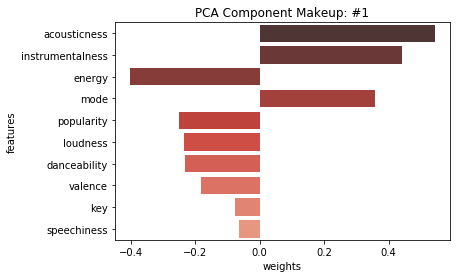

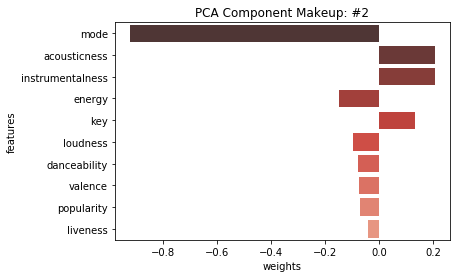

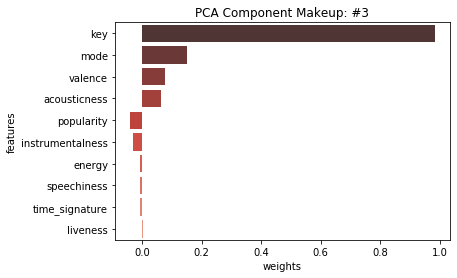

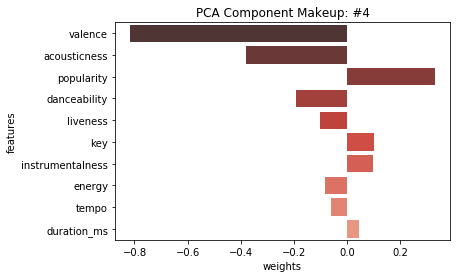

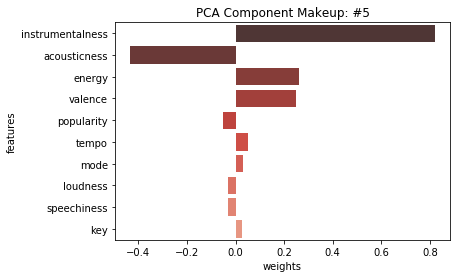

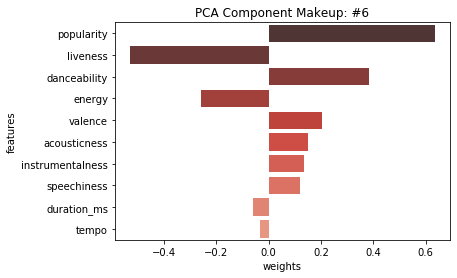

In [24]:
for component_num in v_6.columns+1:
    first_comp = v_6[6-component_num]
    comps = pd.DataFrame(list(zip(first_comp, df_scaled.columns)), columns=['weights', 'features'])
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    ax=sns.barplot(data=comps.sort_values('abs_weights', ascending=False).head(10), x="weights", y="features", palette="Reds_d")
    ax.set_title("PCA Component Makeup: #" + str(component_num))
    plt.show()

In [25]:
PCA_list=['acoustic_instrumental_major', 'acoustic_instrumental_minor', 'positive', 'sad_popular', 'instrumental_positive_energy', 'popular_dance_positive']

### PCA: Model deployment

In [26]:
%%time
pca_predictor = pca_SM.deploy(initial_instance_count=1, 
                                 instance_type='ml.t2.medium')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


---------------!CPU times: user 281 ms, sys: 14.8 ms, total: 296 ms
Wall time: 7min 31s


In [27]:
result = pca_predictor.predict(train_data)

In [28]:
df_pca=pd.DataFrame()
for a in result:
    b=a.label['projection'].float32_tensor.values
    df_pca=df_pca.append([list(b)])
df_pca.index=df_scaled.index
df_pca=df_pca.iloc[:,6:]
df_pca.columns=PCA_list

In [29]:
display(df_pca)

,acoustic_instrumental_major,acoustic_instrumental_minor,positive,sad_popular,instrumental_positive_energy,popular_dance_positive
track_id,,,,,,
2b8fOow8UzyDFAE27YhOZM,0.577220,-0.353271,-0.024312,0.594962,-0.236748,0.148542
21jGcNKet2qwijlDFuPiPb,0.316648,0.013939,0.105043,-0.433580,-0.572397,-0.305475
3eekarcy7kvN4yt5ZFzltW,0.147764,-0.161002,0.640413,-0.001379,0.510005,-0.505921
3ZCTVFBt2Brf31RLEnCkWJ,0.553504,0.013655,0.221314,-0.040276,0.826546,0.295929
2XU0oxnq2qxCpomAAuJY8K,0.418125,-0.278343,-0.043281,-0.016034,0.548584,-0.369869
...,...,...,...,...,...,...
038gsZG1ObZUtFMkwIJnqH,-0.244678,-0.445472,0.082134,0.154445,-0.101117,0.763997
02UfNUoxphQFSLYQnSzqhM,-0.124170,0.211465,-0.306696,-0.273511,-0.069725,0.982135
024szQC1tsQq6UFemGBzo0,-0.138025,-0.220239,-0.564973,0.476273,-0.191378,0.414065


# k-means clustering

In [30]:
# Sagemaker requirement:
train_data = df_pca.to_numpy().astype(np.float32)

### k-means: Model Training

In [31]:
from sagemaker import KMeans

In [32]:
kmeans = KMeans(role=role,
train_instance_count=1,
train_instance_type='ml.c4.xlarge',
output_path=output_path,
k=24)
# data_location could be set

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [33]:
%%time
kmeans.fit(kmeans.record_set(train_data))

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2020-12-03 21:19:35 Starting - Starting the training job...
2020-12-03 21:19:40 Starting - Launching requested ML instances......
2020-12-03 21:20:47 Starting - Preparing the instances for training......
2020-12-03 21:21:51 Downloading - Downloading input data...
2020-12-03 21:22:32 Training - Training image download completed. Training in progress.
2020-12-03 21:22:32 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[12/03/2020 21:22:30 INFO 140192112072512] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_

### k-means: Model deployment

In [34]:
%%time
kmeans_predictor = kmeans.deploy(initial_instance_count=1,
                                 instance_type='ml.m4.xlarge')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


---------------!CPU times: user 283 ms, sys: 12.4 ms, total: 296 ms
Wall time: 7min 32s


### k-means: Accessing model artifact

In [35]:
job_name = kmeans.latest_training_job.name
model_key = f"{folder}/output/{job_name}/output/model.tar.gz"

In [36]:
boto3.resource('s3').Bucket(bucket_name).download_file(model_key, 'model.tar.gz')
os.system('tar -zxvf model.tar.gz')

0

In [37]:
Kmeans_model_params = mx.ndarray.load('model_algo-1')

### k-means: Analysis

In [38]:
cluster_centroids=pd.DataFrame(Kmeans_model_params[0].asnumpy())
cluster_centroids.columns=df_pca.columns

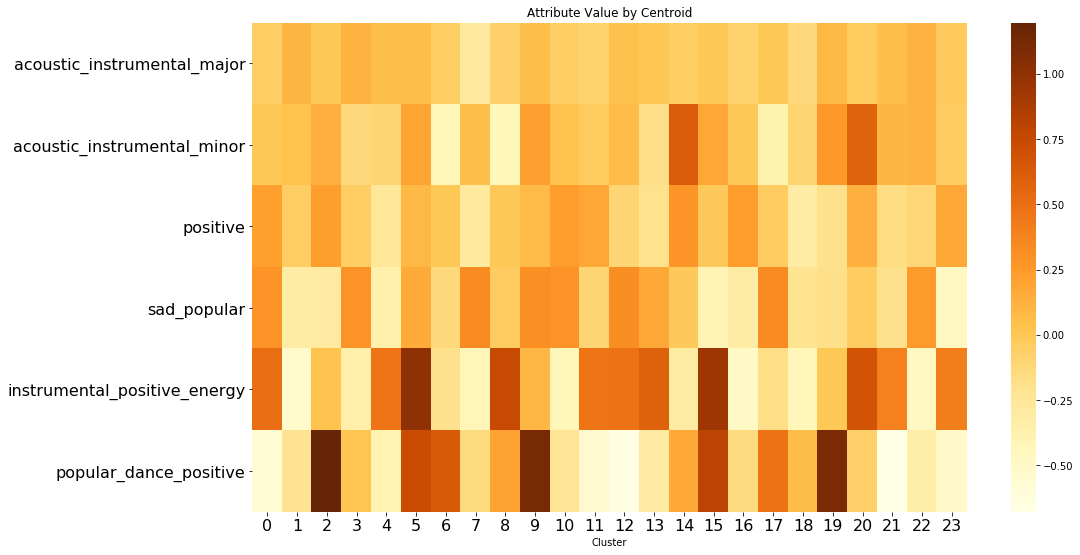

In [39]:
plt.figure(figsize = (16, 9))
ax = sns.heatmap(cluster_centroids.T, cmap = "YlOrBr")
ax.set_xlabel("Cluster")
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
ax.set_title("Attribute Value by Centroid")
plt.show()

In [40]:
# for i, row in cluster_centroids.iterrows():
#     row.sort_values(ascending=False).plot.bar(title=f'Cluster {i}')
#     plt.show()

### k-means: Cluster labeling

In [41]:
result = kmeans_predictor.predict(train_data)

In [42]:
cluster_labels = [r.label['closest_cluster'].float32_tensor.values[0] for r in result]

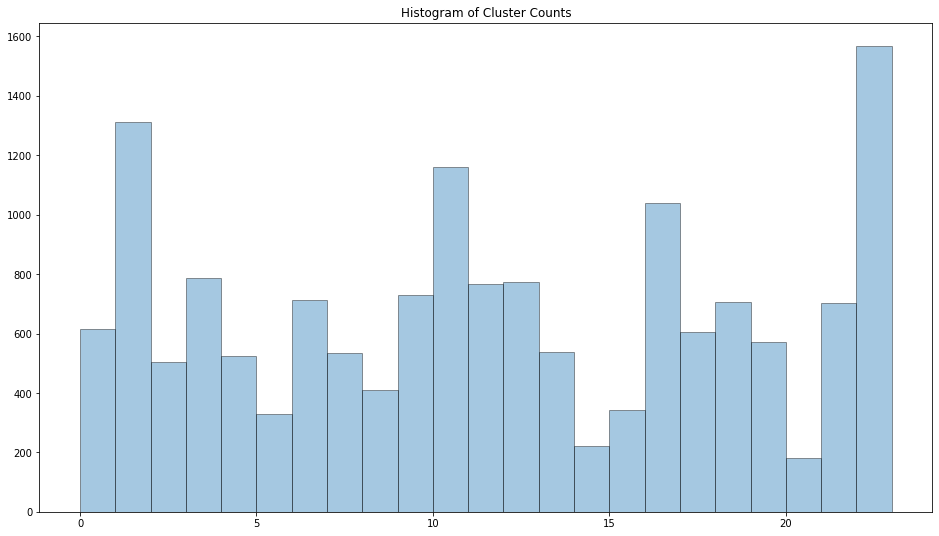

In [43]:
ax=plt.subplots(figsize=(16,9))
ax=sns.distplot(cluster_labels, kde=False, bins=np.arange(0,24),hist_kws=dict(ec="k"))
title="Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [44]:
data['labels']=list(map(int, cluster_labels))

### k-means: Cluster prediction

In [45]:
test_song

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,,,
6WRIgOjGTPfoRy8XaErXf6,Prince,1999 (Edit),1,0.882,0.562,5,-10.971,1,0.0515,0.265,0.000017,0.745,0.715,119.165,218867,4


In [46]:
test_song.drop(['artist_name', 'track_name'], axis=1, inplace=True)
# new_song = pd.DataFrame({'popularity':[90], 'danceability':[0.695], 'energy':[0.601], 'key':[5], 'loudness':[-5.616], 'mode':[0], 'speechiness':[0.1480], 'acousticness':[0.1920], 'instrumentalness':[0.002440], 'liveness':[0.1263], 'valence':[0.4570], 'tempo':[101.993], 'duration_ms':[189323], 'time_signature':[5]})

In [47]:
new_song_scaled = pd.DataFrame(scaler.transform(test_song))
new_song_array = new_song_scaled.to_numpy().astype(np.float32)

result = pca_predictor.predict(new_song_array)
song_pca = pd.DataFrame()
for a in result:
    b=a.label['projection'].float32_tensor.values
    song_pca=song_pca.append([list(b)])
song_pca = song_pca.iloc[:,6:]
song_pca = song_pca.to_numpy().astype(np.float32)

In [48]:
new_song_result = kmeans_predictor.predict(song_pca)
new_song_cluster = int(new_song_result[0].label['closest_cluster'].float32_tensor.values[0])

In [49]:
print(f'This song belongs to cluster {new_song_cluster}')

This song belongs to cluster 7


In [50]:
print(f"... and these are the most popular songs of this cluster:")
display(data[data['labels']==new_song_cluster])

... and these are the most popular songs of this cluster:


,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,labels
track_id,,,,,,,,,,,,,,,,,
1WnqWQcWcuQbVzgE7ecfCY,Kanye West,Every Hour,80,0.588,0.793,7,-6.230,1,0.0794,0.4660,0.000647,0.9130,0.694,76.997,112239,5,7
6PrHpASrdyqydEKc8JFmEX,Zé Felipe,Tiro Certo - Ao Vivo,79,0.710,0.905,5,-5.146,1,0.0716,0.5570,0.000001,0.7090,0.688,130.046,179065,4,7
4gDvg62vG96w0qJaF6wzcd,Diego & Victor Hugo,A Culpa é do Meu Grau (feat. Zé Neto & Cristia...,79,0.542,0.876,6,-3.378,1,0.0972,0.7240,0.000000,0.9250,0.634,118.777,182735,4,7
4Cm51VOGs75ik79YMpJykG,Gustavo Mioto,Fake News - Ao Vivo,78,0.804,0.637,11,-3.187,1,0.0542,0.4700,0.000000,0.9690,0.732,113.979,175205,4,7
3tU3UAasaDA9OixXGC3O33,Mano Walter,Fingindo Maturidade - Ao Vivo,76,0.577,0.919,5,-3.194,1,0.0982,0.2860,0.000000,0.9430,0.736,166.059,189003,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0CNwq5kKPVCh5x9PRQm9QR,Melim,Ouvi Dizer,0,0.654,0.613,7,-7.667,1,0.0541,0.0778,0.000000,0.0804,0.706,81.059,213243,4,7
09kL55tBHtZLDQ7VFoqWlE,Alejandro Fernandez,Sé Que Te Duele,0,0.690,0.875,9,-4.282,1,0.0746,0.2190,0.000000,0.0949,0.793,94.963,226827,4,7
09ZS459XMi5u3QsFKURA5n,Billy Idol,White Wedding - Pt. 1,0,0.673,0.814,9,-5.411,1,0.0367,0.0133,0.002930,0.3430,0.728,147.193,252200,4,7
